In [3]:
# Script name: Assignment 7
# Purpose of script: RSimulate data, draw 1,000 random samples, and generate sample estimates.
# Author: Minh-Thy Tyler
# Date Created: 
# 10/14/2022
# Notes: N/A
# ---------------------------

# Packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('seaborn-darkgrid')
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import os
# Set up working directory
directory_path = '/Users/minh-thytyler/Desktop/2022-2023/ECON 320/HW' # use / instead of \ or use \ but insert r before (for instance: r'C:\your-directory-path')
os.chdir(directory_path)

Consider the following data-generating process (population regression function):
$$y_i = 2.5 + 1.5 * x_i + u_i$$
where X ~ N(10,10) and U ~ N(0,5). X and U are independent.

**Part A**

In [29]:
# Set up the Data Generating Process


# Set NumPy Seed using birthday
birthday = '08182001'
rng = np.random.RandomState(int(birthday))

#Declare your betas
beta0= 2.5
beta1= 1.5


# Calculate y, x and u over 100,000 values
x = rng.normal(loc = 10, scale=float(10)**.5, size = 100000)
u = rng.normal(loc = 0, scale= float(5)**.5, size = 100000)
y = beta0 + beta1 * x + u

# Store in Pandas DataFrame
population_data = pd.DataFrame({'y' : y, 'x' : x, 'u':u })
population_data.head()

,y,x,u
0,18.344779,12.968579,-3.608090
1,15.540891,8.018650,1.012916
2,16.222621,9.476238,-0.491735
3,21.547289,10.917037,2.671733
4,21.389018,11.908683,1.025993


In [17]:
coefs.rsquared

#rsquared.results


0.8278302675134497

In [33]:
sample_df['y_hat'] = coefs.fittedvalues

**Part B**

In [5]:
# Get a sample of 1000 observations, estimating B0 and B1
sample_df = population_data.sample(n = 1000, random_state = 99)

print(sample_df.head())

mod = smf.ols(formula = 'y ~ x', data = sample_df)

coefs = mod.fit()

print(coefs)

print(coefs.summary())

               y          x         u
86155  15.150869  10.050169 -2.424385
29633  18.573493   9.658925  1.585106
67710  15.352729   9.391604 -1.234677
62348   8.497672   4.534294 -0.803770
98787  11.348491   6.922958 -1.535946
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     4799.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:16:07   Log-Likelihood:                -2184.7
No. Observations:                1000   AIC:                             4373.
Df Residuals:                     998   BIC:                             4383.
Df Model:                           1                                         
Covariance Type:            nonrobust                        

In [8]:
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     4799.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:16:26   Log-Likelihood:                -2184.7
No. Observations:                1000   AIC:                             4373.
Df Residuals:                     998   BIC:                             4383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7317      0.223     12.241      0.000       2.294       3.170
x              1.4825      0.021     69.272      0.000       1.440       1.524
==============================================================================
Omnibus:                        1.156   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                1.184
Skew:                          -0.028   Prob(JB):                        0.553
Kurtosis:                       2.841   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#Beta0 and beta1 estimates
b = coefs.params
print(f'b: \n{b}\n')

b: 
Intercept    2.731746
x            1.482466
dtype: float64



**Part C**

In [53]:
#run the procedure of the loop
beta0_ar = []
beta1_ar = []
for i in range(1000):
    sample_df = population_data.sample(n= 1000, random_state=i)
    reg = smf.ols(formula = 'y ~ x', data = sample_df).fit()
    beta0_ar.append(reg.params[0])
    beta1_ar.append(reg.params[1])
    
reg_coeff_df = pd.DataFrame({'beta0':beta0_ar, 'beta1': beta1_ar})
reg_coeff_df.head()

,beta0,beta1
0,2.672006,1.483146
1,2.880405,1.477161
2,2.771094,1.473048
3,2.384784,1.515493
4,2.542764,1.499580


**Part D**

Text(0.5, 1.0, 'Fig 1: Sampling Distribution of Beta 0 hat')

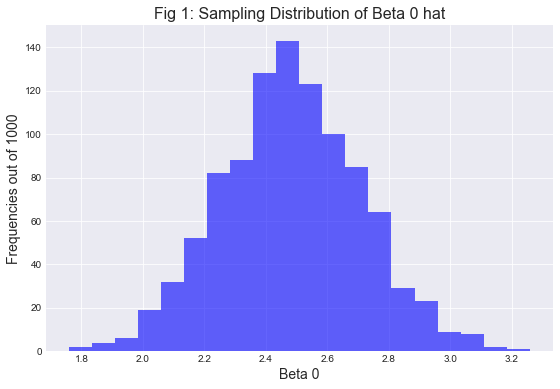

In [54]:
plt.figure(figsize= (20,6))

#Distribution of Beta0
plt.subplot(1,2,1)
plt.hist(reg_coeff_df['beta0'], alpha = .6, color = 'Blue', bins = 20)
plt.xlabel("Beta 0", fontsize = 14)
plt.ylabel("Frequencies out of 1000", fontsize = 14)
plt.title("Fig 1: Sampling Distribution of Beta 0 hat", fontsize = 16)


Text(0.5, 1.0, 'Fig 2: Sampling Distribution of Beta 1 hat')

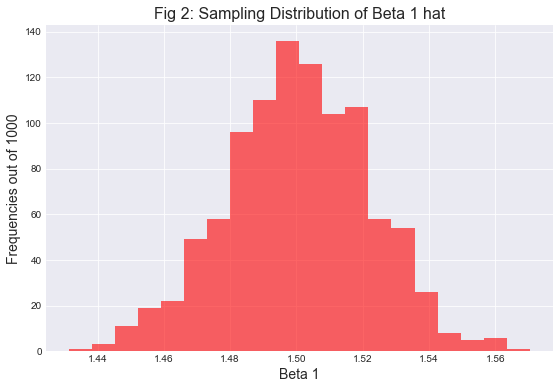

In [55]:
plt.figure(figsize= (20,6))

#Distribution of Beta1
plt.subplot(1,2,1)
plt.hist(reg_coeff_df['beta1'], alpha = .6, color = 'Red', bins = 20)
plt.xlabel("Beta 1", fontsize = 14)
plt.ylabel("Frequencies out of 1000", fontsize = 14)
plt.title("Fig 2: Sampling Distribution of Beta 1 hat", fontsize = 16)

**Part E** What happens to the sampling distribution of the estimate of $β_1$ if U ~ N(0,50) or U ~ N(0,1)? Present two more histograms, Figures 3 and 4.


**Answer:**  When U ~ N(0,1), the sampling distribution of the estimate of beta 1 has a smaller range from ~1.47 to ~1.54 compared to the beta1 when U ~ N(0,5). When U ~ N(0,50) the sampling distribution of the estimate of beta 1 has a larger range from ~1.3 to ~1.7. 

Text(0.5, 1.0, 'Fig 1: Sampling Distribution of Beta 1 hat if U ~ N(0,1)')

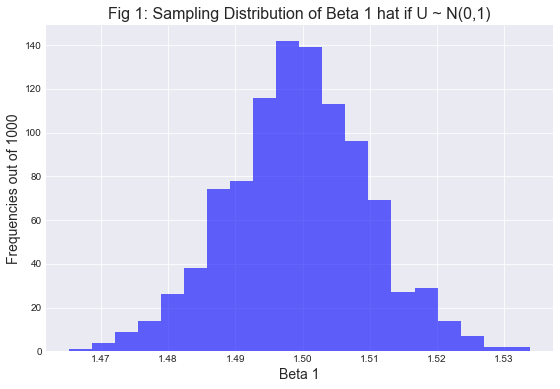

In [56]:
#if U ~ N(0,1)

n = 100000
u = rng.normal(0,float(1)**.5,n)
y = 2.5 + 1.5*x + u
population = pd.DataFrame({'y':y, 'x':x, 'u':u})

sample_df = population.sample(n = 1000, random_state = 99)
mod = smf.ols(formula = 'y ~ x', data = sample_df)

coefs = mod.fit()
beta1_ar = []
for i in range(1000):
    sample_df = population.sample(n= 1000, random_state=i)
    reg = smf.ols(formula = 'y ~ x', data = sample_df).fit()
    beta1_ar.append(reg.params[1])
    
reg_coeff_df = pd.DataFrame({'beta1': beta1_ar})

plt.figure(figsize= (20,6))

#Distribution of Beta1 
plt.subplot(1,2,1)
plt.hist(reg_coeff_df['beta1'], alpha = .6, color = 'Blue', bins = 20)
plt.xlabel("Beta 1", fontsize = 14)
plt.ylabel("Frequencies out of 1000", fontsize = 14)
plt.title("Fig 1: Sampling Distribution of Beta 1 hat if U ~ N(0,1)", fontsize = 16)




Text(0.5, 1.0, 'Fig 1: Sampling Distribution of Beta 1 hat if U ~ N(0,50)')

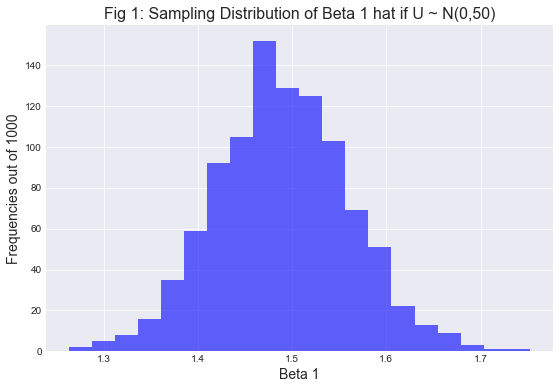

In [57]:
#if U ~ N(0,50)

u = rng.normal(0,float(50)**.5,n)
y = 2.5 + 1.5*x + u
population = pd.DataFrame({'y':y, 'x':x, 'u':u})

sample_df = population.sample(n = 1000, random_state = 99)
mod = smf.ols(formula = 'y ~ x', data = sample_df)

coefs = mod.fit()

beta1_ar = []
for i in range(1000):
    sample_df = population.sample(n= 1000, random_state=i)
    reg = smf.ols(formula = 'y ~ x', data = sample_df).fit()
    beta1_ar.append(reg.params[1])
    
reg_coeff_df = pd.DataFrame({'beta1': beta1_ar})

plt.figure(figsize= (20,6))

#Distribution of Beta1 
plt.subplot(1,2,1)
plt.hist(reg_coeff_df['beta1'], alpha = .6, color = 'Blue', bins = 20)
plt.xlabel("Beta 1", fontsize = 14)
plt.ylabel("Frequencies out of 1000", fontsize = 14)
plt.title("Fig 1: Sampling Distribution of Beta 1 hat if U ~ N(0,50)", fontsize = 16)

